In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
datapath = "./data/SMSSpamCollection"
#ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
#spam	Ok lar... Joking wif u oni...

# Load the dataset
data = pd.read_csv(datapath, sep="\t", header=None)
data.columns = ["label", "text"]
data["label"] = data["label"].map({"ham": 0, "spam": 1})
print(data.head())



   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [35]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [37]:
data['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [38]:
#convert data['text'] to numerical data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data['text'])

y = data['label']

In [39]:
#it has too many columns so we will use PCA to reduce the number of columns
from matplotlib import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.toarray())

pca = PCA(n_components=15)

X = pca.fit_transform(X)


In [40]:
X.shape

(5572, 15)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [42]:

accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.92      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



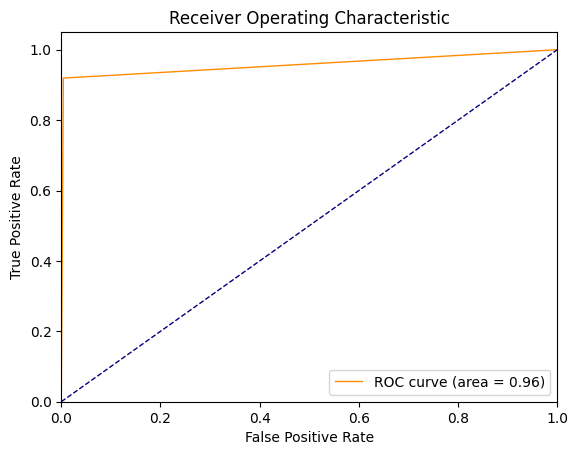

In [43]:
#print roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
#save the model
import joblib
joblib.dump(rf, "spam_model.pkl")

#save the vectorizer
joblib.dump(cv, "spam_vectorizer.pkl")

['spam_vectorizer.pkl']